# AMEX DEFAULT

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)


#Generic libraryies
import random
import math
import itertools
import gc  # Garbage collector


#Time and monitoring libraries
import time
from tqdm import tqdm
import pyprind

#Visual libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import sys
import os
for dirname, _, filenames in os.walk(".\data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

.\data\amex-default-prediction.zip
.\data\loadData.ipynb
.\data\sample_submission.csv
.\data\test_data.csv
.\data\train_data.csv
.\data\train_labels.csv


In [12]:
labels = pd.read_csv(".\\data\\train_labels.csv")

In [3]:
labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [4]:
labels.tail()

,customer_ID,target
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1
458912,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0


In [5]:
labels.shape

(458913, 2)

In [14]:
train = pd.read_csv(".\\data\\train_data.csv")

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 7.8+ GB


In [17]:
train.tail()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979332,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,NaN,0.014225,0.002178,0.000029,0.738777,0.035575,0.002472,0.395745,0.530723,0.062524,NaN,0.122715,0.018121,0.000668,0.087155,0.008060,0.013776,0.002056,0.281378,0.683896,0.250840,NaN,0.036700,0.010752,0.000038,1.000896,0.005366,0.055695,0.056982,0.705097,0.039867,0.134237,0.052506,0.002700,0.001784,0.021471,0.022302,0.420651,0.889792,0.005293,0.010653,0.483833,0.324893,CL,O,0.002312,0.835932,0.004504,0.442891,0.003550,NaN,0.415415,5.0,0.188514,0.003234,0.511308,0.001555,0.004116,0.002444,0.003292,0.009643,0.006536,0.204409,0.009346,NaN,0.003754,0.009699,0.075262,NaN,0.004816,0.002772,0.305819,0.021410,0.003812,0.001906,0.008669,0.002120,NaN,0.008612,0.000113,0.006990,0.006234,0.001429,0.000298,0.507415,0.006024,1.007709,0.017920,0.004097,0.003328,0.007850,0.000130,0.009785,0.000894,NaN,0.0,0.000671,0.008113,NaN,0.000511,0.003185,NaN,1,0.003172,0.005075,0.000481,0.004446,0.005996,0.002718,0.008657,0.009908,0.009409,0.000185,0.007774,0.001110,0.002321,0.009730,0.008740,0.003061,0.009790,0.971546,0.132063,0.975162,0.970563,0.006208,0.009640,0.009871,0.003745,NaN,NaN,0.004995,0.003618,0.022897,NaN,1.009910,3.0,NaN,0.002429,NaN,NaN,NaN,1.008538,0.002501,0.257406,0.202654,1.0,0.021173,0.0,3.0,0.016894,0.016141,0.0,0.713049,0.293002,0.009740,0.456870,0.000184,1.0,1.009286,1.003089,1.005537,0.008078,NaN,0.008894,0.004508,NaN,0.000776,0.007069,NaN,NaN,NaN,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,NaN,0.009467,0.005217,0.014354,0.744180,0.029612,0.008717,0.394486,0.534473,0.051502,NaN,0.171524,0.021853,0.006863,0.100331,0.004997,0.005645,0.002460,0.286289,0.705934,0.284274,NaN,0.008777,0.005119,0.004619,1.008350,0.002628,0.049632,0.058002,0.705059,0.035277,0.141704,0.049879,0.000881,0.002997,0.025450,0.012113,0.396883,0.171943,0.018179,0.010991,0.244838,0.328528,CL,O,0.008700,0.755125,0.177476,1.007094,0.001558,NaN,0.000019,5.0,0.188050,0.007746,0.423013,0.001069,0.005924,0.005239,0.004382,0.015031,0.006514,0.203718,0.007823,NaN,0.009763,0.007173,0.005153,NaN,0.006692,0.000017,0.303197,0.007603,0.002554,0.008055,0.007019,0.003587,NaN,0.008065,0.004172,0.005149,0.007220,0.000454,0.000099,0.500572,0.000252,1.003941,0.024238,0.008985,0.005157,0.004340,0.003161,0.001981,0.007411,NaN,0.0,0.000642,0.003802,NaN,0.007878,0.009902,NaN,1,0.009408,0.006331,0.009734,0.007979,0.007256,0.002910,1.007768,0.000334,0.006637,0.003084,0.009291,0.003200,0.000006,0.000904,0.003348,0.008171,0.002250,0.878800,0.137596,0.900471,0.974740,0.004722,0.005741,0.008381,0.008016,NaN,NaN,0.006982,0.006475,0.013445,NaN,1.007353,3.0,NaN,0.006503,NaN,NaN,NaN,1.001772,0.028988,0.253864,0.200897,1.0,0.030905,0.0,3.0,0.031754,0.030034,0.0,0.715156,0.437259,0.004329,0.456621,0.009180,1.0,1.004053,1.008834,1.008500,0.003

In [26]:
df = pd.merge(train,labels , on="customer_ID", how='left')

In [27]:
df.to_csv("./data/df.csv", index = False)

KeyboardInterrupt: 

In [ ]:
df.info()

# Target feature

First we will see the target's distribution.

In [18]:
labels.groupby("target").count()*100/len(labels)

,customer_ID
target,
0,74.106639
1,25.893361


Its 74% non-default vs 26% default. It isn't very unbalanced.

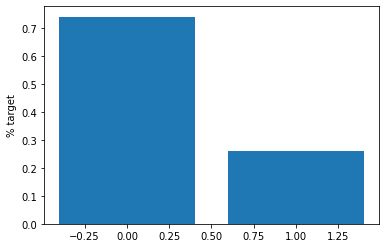

In [19]:
aux = labels.target.value_counts()/len(labels)
plt.bar(x = [0,1], height = [aux.iloc[0], aux.iloc[1]])
plt.ylabel('% target')
plt.show()

# Train EDA

First we are goint to analize numeric columns, because probably we must do aggregations and later these will be categorical.

**We must keep in mind that:**
* D_* = Delinquency variables
* S_* = Spend variables
* P_* = Payment variables
* B_* = Balance variables
* R_* = Risk variables

In [21]:
dims = train.shape
print("We have", dims[0] , "rows and", dims[1], "columns.")

We have 5531451 rows and 190 columns.


In [13]:
dropCols = []

In [15]:
print(f"There are {df.select_dtypes('object').shape[1]} object columns \nThere are {df.select_dtypes('int').shape[1]} int columns\nThere are {df.select_dtypes('float').shape[1]} float columns")

There are 4 object columns 
There are 1 int columns
There are 185 float columns


In [16]:
categorical = []
integer = []
floats = []

for col in tqdm(df.columns):
    if df[col].dtype == 'O':
        categorical.append(col)
    elif df[col].dtype == 'float':
        floats.append(col)
    else:
        integer.append(col)

100%|██████████| 190/190 [00:00<00:00, 25866.39it/s]


### Drop columns duplicates

In [17]:
%time df = df.T.drop_duplicates().T

CPU times: user 11min 39s, sys: 10.5 s, total: 11min 50s
Wall time: 11min 49s


In [18]:
for col in tqdm(df.columns):
    if col in integer:
        df[col] = pd.to_numeric(df[col])
    elif col in floats:
        df[col] = pd.to_numeric(df[col])

100%|██████████| 190/190 [01:50<00:00,  1.71it/s]


In [19]:
print(f"There are {df.select_dtypes('object').shape[1]} object columns \nThere are {df.select_dtypes('int').shape[1]} int columns\nThere are {df.select_dtypes('float').shape[1]} float columns")

There are 4 object columns 
There are 1 int columns
There are 185 float columns


### Integer columns

In [20]:
df.select_dtypes('int').nunique().sort_values().to_frame().T

,B_31
0,2


In [21]:
print(df["B_31"].unique())
print(df["B_31"].sum()*100/len(df) ,"are the same values, this column seem that hasn't got info.")

dropCols.append("B_31")

[1 0]
99.71192796891786 are the same values, this column seem that hasn't got info.


### Float columns

In [22]:
floatsAux = df.select_dtypes('float').nunique().sort_values().to_frame().T *100/len(df)
print("Columns with less than 5% distinct values, probably are not useless, we are going to analice and compare with other partitions. Then we will decide if this columns will be deleted.")

floatsAux = floatsAux[floatsAux <= 5 ].dropna(axis =1)
for col in floatsAux.columns.values:
    dropCols.append(col)
    
    
floatsAux

Columns with less than 5% distinct values, probably are not useless, we are going to analice and compare with other partitions. Then we will decide if this columns will be deleted.


,D_87,D_120,D_66,D_116,D_114,D_126,B_30,D_117,B_38,D_68,D_88,D_108,D_111,D_110,B_39,D_73,B_42,D_138,D_134,D_137,D_136,D_135
0,0.000218,0.000436,0.000436,0.000436,0.000436,0.000654,0.000654,0.001525,0.001525,0.001525,0.119195,0.527987,0.607087,0.607087,0.650232,1.005201,1.221582,3.5364,3.5364,3.5364,3.5364,3.5364


### Categorical columns

In [23]:
df.select_dtypes('O').nunique().sort_values().to_frame().T

,D_64,D_63,S_2,customer_ID
0,4,6,396,38024


In [24]:
df.groupby("D_64").count()["customer_ID"]*100/len(df)

D_64
-1     0.654372
O     52.866665
R     15.005241
U     27.522864
Name: customer_ID, dtype: float64

In [25]:
df.groupby("D_63").count()["customer_ID"]*100/len(df)

D_63
CL     7.891474
CO    74.401902
CR    16.905165
XL     0.122681
XM     0.189578
XZ     0.489199
Name: customer_ID, dtype: float64

In [26]:
train = labels.merge(df, on = ["customer_ID"], how = "left")

### ¿Drop columns?

In [27]:
train[dropCols]

,B_31,D_87,D_120,D_66,D_116,D_114,D_126,B_30,D_117,B_38,D_68,D_88,D_108,D_111,D_110,B_39,D_73,B_42,D_138,D_134,D_137,D_136,D_135
0,1.0,NaN,0.0,NaN,0.0,1.0,1.0,0.0,4.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,0.0,NaN,0.0,1.0,1.0,0.0,4.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,0.0,NaN,0.0,1.0,1.0,0.0,4.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,0.0,NaN,0.0,1.0,1.0,0.0,4.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,0.0,NaN,0.0,1.0,1.0,0.0,4.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### B_31

In [28]:
df["B_31"].value_counts()

1    457591
0      1322
Name: B_31, dtype: int64

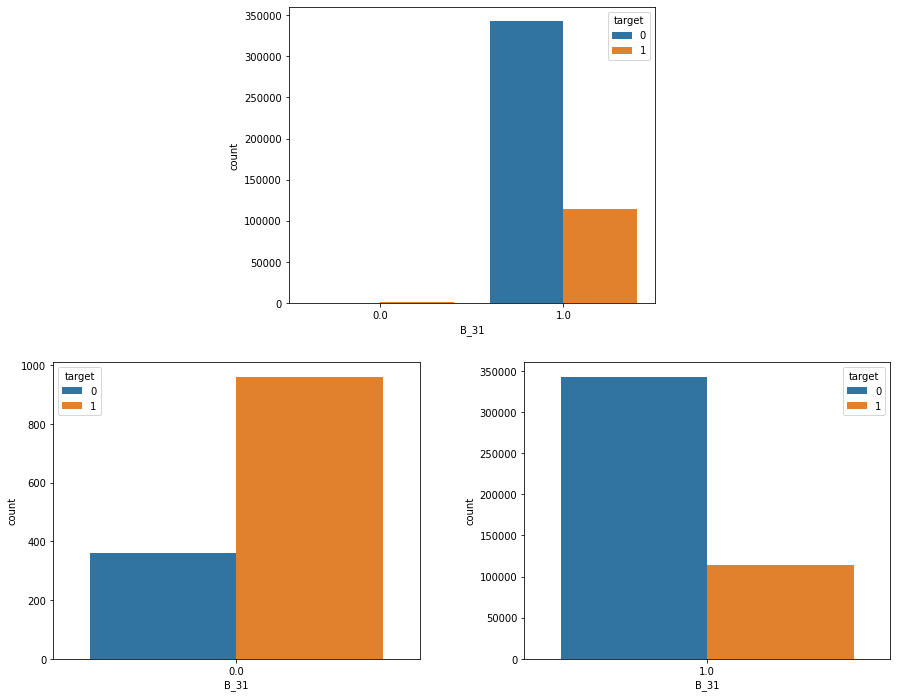

In [29]:
fig = plt.figure(figsize=(15,12))
gs = gridspec.GridSpec(2, 4, figure = fig)
gs.update(wspace=0.8 )

ax1 = plt.subplot(gs[1, :2], )
sns.countplot(data = train[train["B_31"] == 0][[dropCols[0], "target"]] , x = "B_31", hue = "target", ax=ax1)

ax2 = plt.subplot(gs[1, 2:])
sns.countplot(data = train[train["B_31"] == 1][[dropCols[0], "target"]] , x = "B_31", hue = "target" , ax=ax2)

ax3 = plt.subplot(gs[0, 1:3])
sns.countplot(data = train[[dropCols[0], "target"]] , x = "B_31", hue = "target", ax=ax3)

plt.show()